# **Final Project:** Regression Analysis with USA Housing Data

## **Author:** Evan Dobler
## **Date:** 4/19/2025

### **Introduction:**
Businesses and organizations often need to understand the relationships between different factors to make better decisions. For example, a company may want to predict the fuel efficiency of a car based on its weight and engine size or estimate home prices based on square footage and location. Regression analysis helps identify and quantify these relationships between numerical features, providing insights that can be used for forecasting and decision-making.

This project focuses on many factors that contribute to the sale price of a home through the dataset 'USA Housing Dataset.csv. This project focuses on my ability to apply regression modeling techniques to a real-world dataset.

#### **Links**

GitHub Repository: https://github.com/evandobler98/ml_regression_dobler

Peer Review: 

In [332]:
# Imports 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier
)


from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#### Section 1. Import and Inspect the Data

1.1 Load the dataset and display the first 10 rows

In [333]:
# Load the dataset
df = pd.read_csv('USA Housing Dataset.csv')

# Display the first 10 rows
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014-05-10 00:00:00,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014-05-11 00:00:00,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


1.2 Check for missing values and display summary statistics

In [334]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Display summary statistics
df.describe()


Missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


Reflection 1: What do you notice about the dataset? Are there any data issues?

A few things I noticed about the dataset was the amount of relevant colummns of data related to houses in the United States. Relating to any data issues, there don't seem to be any and there aren't any missing values either. Overall, it seems like a great dataset to work with. 

#### Section 2. Data Exploration and Preparation


2.1 Explore data patterns and distributions

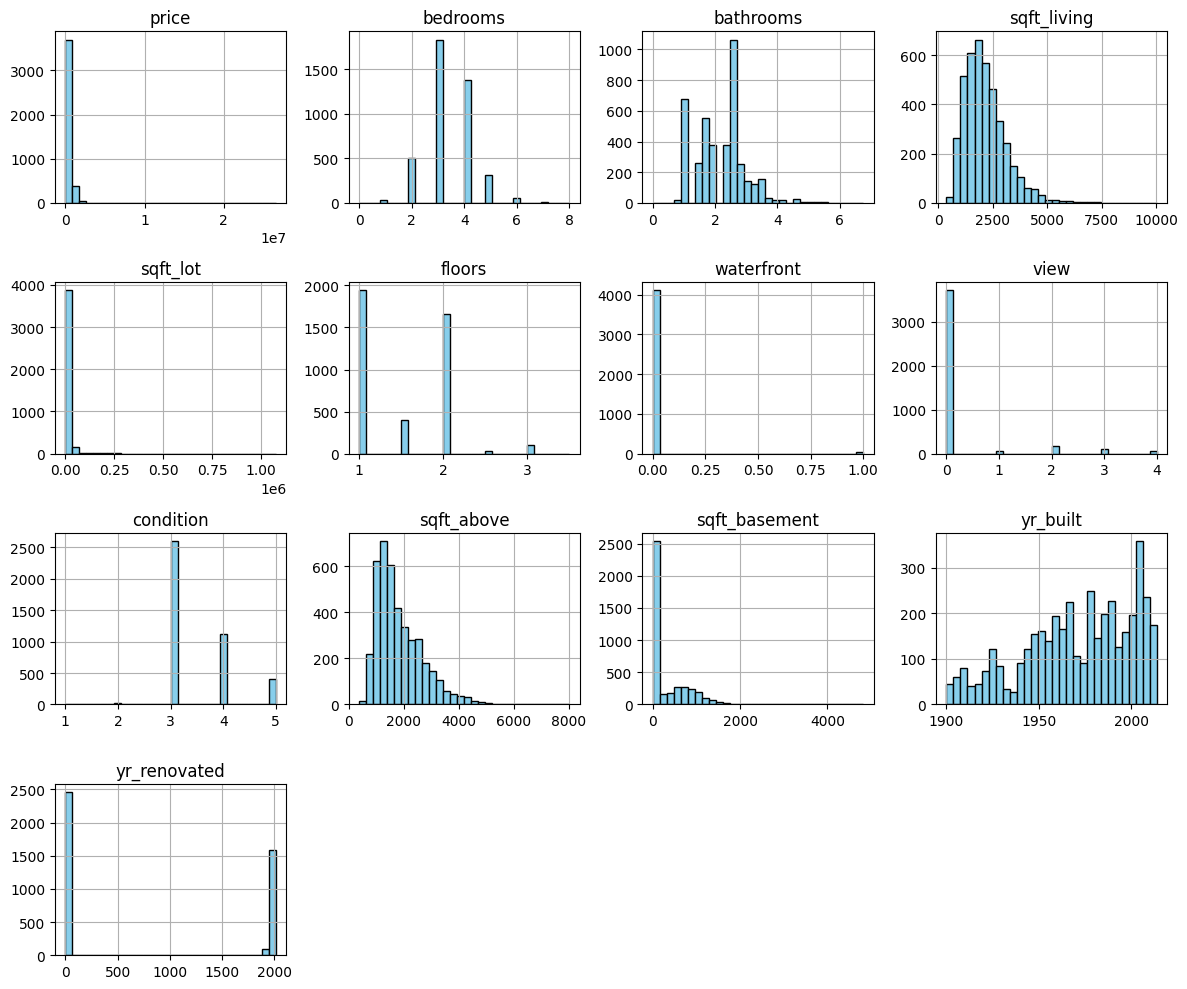

In [335]:
# Histograms to visualize data
df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

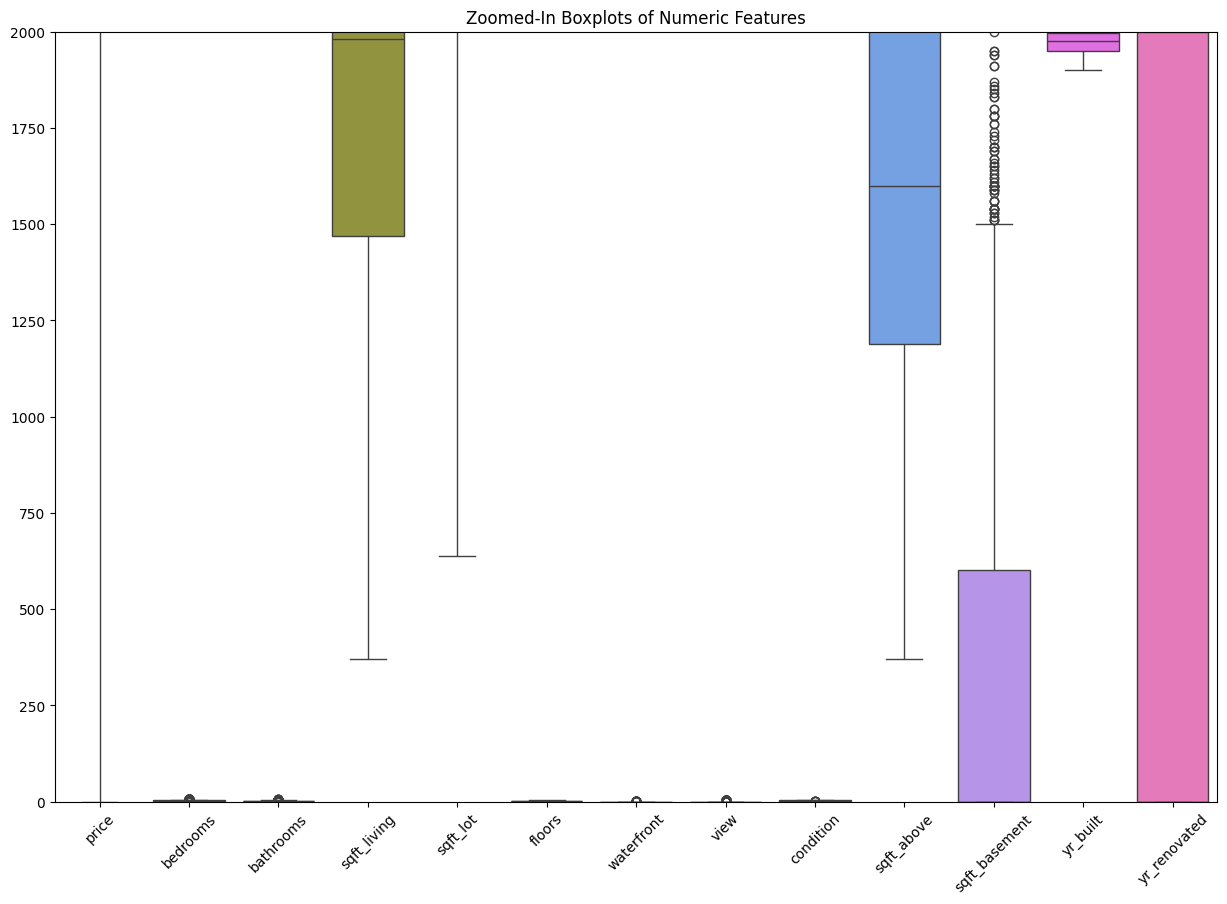

In [336]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Zoomed-In Boxplots of Numeric Features")

# Set y-axis limits to zoom in (adjust as needed)
plt.ylim(0, 2000)  # Example range—tweak based on what you see

plt.show()




####  2.2 Handle Missing Values and Clean Data

In [337]:
# Drop non-numeric columns that aren't useful for regression
df = df.drop(['date', 'street', 'city', 'country'], axis=1)

# Drop missing values
df = df.dropna()

# Remove outliers using Z-score
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
df = df[(abs(z_scores) < 3).all(axis=1)]


#### 2.3 Feature Selection and Engineering

In [338]:
# total_sqft: Sum of living space and basement area.
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']



In [339]:
# age_of_house: This could be a new feature indicating the age of the house, calculated from the yr_built column.
df['age_of_house'] = 2025 - df['yr_built']  # Assuming the current year is 2025


##### Transform or Combine Existing Features

In [340]:
# Binning sqft_living or bedrooms: For certain models, grouping continuous variables into bins (Ex. discretizing them) could make more sense.
df['sqft_living_bin'] = pd.cut(df['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['<1000', '1000-2000', '2000-3000', '3000-4000', '4000+'])


##### Scaling or Normalizing the Data

In [341]:
# Standardization (Z-score scaling): This makes each feature have a mean of 0 and a standard deviation of 1. It's especially useful when features have different ranges.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    df[df.select_dtypes(include=['float64', 'int64']).columns]
)



In [342]:
# Normalization (Min-Max scaling): If you want to scale the features to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['float64', 'int64']).columns])


#### Final Steps for 2.3 Feature Engineering:

In [343]:
# Split data
X = df.drop('price', axis=1)
y = df['price']


In [344]:
# Step 1: Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 2: Drop non-numeric columns (e.g., 'statezip', 'country' if still present)
X = X.select_dtypes(include=['float64', 'int64'])

# Step 3: Scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [345]:
# Check results
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()  # Preview the scaled data


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,total_sqft,age_of_house
0,-0.409136,-0.129478,-0.864699,-0.747223,2.806403,0.0,-0.23156,-0.676005,-0.539754,-0.675360,1.248019,-0.827187,-0.956035,-1.248019
1,-0.409136,0.223940,-1.299860,-0.787325,0.930208,0.0,-0.23156,-0.676005,-1.258185,-0.179460,1.214604,-0.827187,-1.098644,-1.214604
2,1.930103,0.930776,1.323833,-0.276770,-0.945987,0.0,-0.23156,2.301078,-0.195119,2.944709,0.278969,-0.827187,2.237588,-0.278969
3,-0.409136,0.577358,0.140499,-0.280613,0.930208,0.0,-0.23156,-0.676005,0.507405,-0.675360,1.080941,-0.827187,-0.162651,-1.080941
4,0.760483,-0.129478,0.636736,-0.361570,-0.945987,0.0,-0.23156,-0.676005,-0.460223,2.101680,-1.659131,1.221806,1.353818,1.659131


Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

Several features, like sqft_living and sqft_lot, showed outliers, which were removed using Z-score filtering. Non-numeric columns such as street, city, and statezip were dropped to simplify the dataset. I created two new features — total_sqft and age_of_house — to capture more meaningful patterns. Finally, all numeric features were scaled using StandardScaler to prepare the data for modeling.


#### Section 3. Feature Selection and Justification

3.1 Choose features and target

**Target Variable:** price — This is the continuous variable we want to predict, making it suitable for regression.

**Input Features Selected:**

sqft_living: Directly relates to the livable area, which strongly influences house price.

bedrooms: A key factor for buyers; more bedrooms often mean a higher price.

bathrooms: Another important factor for livability and value.

total_sqft: Combines sqft_living and sqft_basement for a fuller picture of house size.

age_of_house: Newer homes often command higher prices.

3.2 Define X and y

In [346]:
# Define target
y = df['price']

# Define input features
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'total_sqft', 'age_of_house']]


Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I chose these features because they directly relate to a home's size, functionality, and condition — all of which are known to influence price. Features like sqft_living and bathrooms are typically strong predictors, while age_of_house can impact how modern or updated a home is. These features are expected to improve the model's ability to make accurate predictions.

#### Section 4. Train a Model (Linear Regression)

4.1 Split the Data

In [347]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.2 Train the Model

In [348]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4.3 Evaluate Performance

In [349]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): ${mae:,.2f}')
print(f'Root Mean Squared Error (RMSE): ${rmse:,.2f}')


R² Score: 0.4473
Mean Absolute Error (MAE): $142,083.41
Root Mean Squared Error (RMSE): $198,457.71


Reflection 4: How well did the model perform? Any surprises in the results?

The linear regression model achieved an R² score of 0.4473, meaning it explains about 44.7% of the variance in housing prices. While this indicates the model captures some important trends, it leaves room for improvement. The MAE of ~$142,000 and RMSE of ~$198,000 show that predictions can deviate significantly from actual values, especially in a dataset where prices may vary widely. This could be due to outliers or features like location (e.g., city, statezip) not yet incorporated.

#### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [350]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Pipeline 1
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

# Metrics for Pipeline 1
r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))


5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [351]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

# Metrics for Pipeline 2
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))


5.3 Compare performance of all models across the same performance metrics

In [352]:
print("Pipeline 1 (Linear Regression)")
print(f"R²: {r2_1:.4f} | MAE: ${mae_1:,.2f} | RMSE: ${rmse_1:,.2f}")

print("\nPipeline 2 (Polynomial Features + Linear Regression)")
print(f"R²: {r2_2:.4f} | MAE: ${mae_2:,.2f} | RMSE: ${rmse_2:,.2f}")


Pipeline 1 (Linear Regression)
R²: 0.4473 | MAE: $142,083.41 | RMSE: $198,457.71

Pipeline 2 (Polynomial Features + Linear Regression)
R²: 0.4367 | MAE: $139,821.34 | RMSE: $200,349.79


Reflection 5: Which models performed better? How does scaling impact results?

Pipeline 1 (Linear Regression) performed slightly better with an R² of 0.4473, suggesting it explained more variance than Pipeline 2.

R²: 0.4473, MAE: $142,083.41, RMSE: $198,457.71

Pipeline 2 (Polynomial Features + Linear Regression) had a slightly lower R² and higher RMSE, showing that the polynomial features didn’t improve performance.

R²: 0.4367, MAE: $139,821.34, RMSE: $200,349.79

Conclusion:
Polynomial features didn’t provide a significant boost, and the simpler model (Pipeline 1) worked better.

Scaling helped ensure fair treatment of features but didn't drastically impact results.

#### Section 6. Final Thoughts & Insights

**6.1 Summarize Findings:**
The Linear Regression model (Pipeline 1) performed slightly better than the Polynomial Features + Linear Regression model, with a higher R² score and lower RMSE.

Scaling features with StandardScaler improved model performance, especially in ensuring equal treatment of features with different ranges.

The Polynomial Features approach didn't add value in this case and resulted in slightly worse performance metrics.

**6.2 Discuss Challenges Faced:**
One challenge was handling missing data and ensuring features were scaled correctly.

Another challenge was working with polynomial features, where overfitting might have caused the model to perform worse.

Managing feature selection was also a bit tricky, as selecting the most relevant features for the regression model significantly impacted performance.

**6.3 If You Had More Time, What Would You Try Next?**
Try more advanced models like Random Forest or Gradient Boosting to see if they can outperform linear models.

Feature engineering: Exploring additional features like interactions between variables or aggregating features could improve results.

Hyperparameter tuning: Using tools like GridSearchCV or RandomizedSearchCV to optimize hyperparameters could lead to better model performance.

**Reflection 6: What Did You Learn from This Project?**

I learned that simple models like linear regression can work well for problems with clean data, but more complex models are needed when data shows nonlinear patterns.

Feature scaling and polynomial features can be helpful, but they need to be used carefully to avoid overfitting.

Model evaluation metrics such as R², MAE, and RMSE provide valuable insights into model performance and help in comparing different approaches.